In [1]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

In [26]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import  export_graphviz
import graphviz


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from pathlib import Path

In [27]:
if 'google.colab' in str(get_ipython()):
    folder = Path('/content/drive/MyDrive/data/datasets')
else:
    folder = Path('/home/harpreet/Insync/google_drive_shaannoor/data/datasets')
    

# Decision Trees

## Decision Trees Classifier

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.902


In [5]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.909


In [16]:
data = dtree.feature_importances_.reshape(-1,30)

In [17]:
data.shape

(1, 30)

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [18]:
df = pd.DataFrame(data = data, columns=cancer.feature_names )

In [24]:
df.T.sort_values(by = 0, ascending=False)

,0
worst perimeter,0.757086
worst concave points,0.109766
worst radius,0.038486
worst texture,0.030876
mean texture,0.015586
mean symmetry,0.011501
area error,0.010430
perimeter error,0.010233
worst fractal dimension,0.009310
worst concavity,0.004190


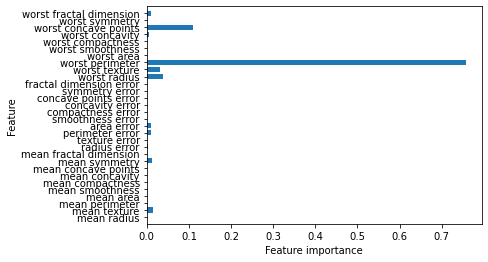

In [25]:
%matplotlib inline
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dtree)

## Decision Trees Regressor

In [28]:
ram_prices = pd.read_csv( folder / 'ram_price.csv') 

In [29]:
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


Text(0, 0.5, 'Price in $/Mbyte')

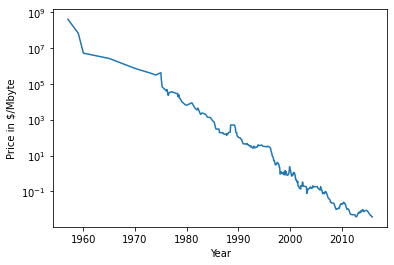

In [30]:
%matplotlib inline
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [36]:
# predict prices based on date
X_train = data_train.date.values.reshape(-1,1)
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date.values.reshape(-1, 1)

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

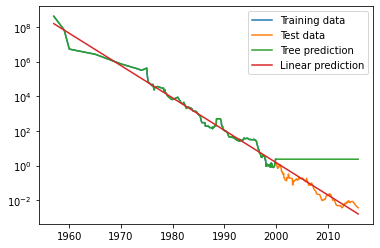

In [37]:
%matplotlib inline
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

## Decision Trees with GridSearch
- Important hyperparameters
  - criterion: the function to measure the quality of a split. Default: "gini". change to "entropy"
  - max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
  - min_samples_split: The minimum number of samples required to split an internal node.
  - min_samples_leaf: The minimum number of samples required to be at a leaf node
  - max_leaf_nodes

In [38]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=0)

### max_leaf_nodes

In [39]:
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 123)
param_DT = {"max_leaf_nodes": range(2,20)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5, return_train_score=True)
grid_tree.fit(X_train,y_train)
print(grid_tree.best_params_)
print(f'Best Mean Cross Validation Score is {grid_tree.best_score_}')
print("Accuracy on training set: {:.3f}".format(grid_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid_tree.score(X_test, y_test)))

{'max_leaf_nodes': 5}
Best Mean Cross Validation Score is 0.9366073871409029
Accuracy on training set: 0.955
Accuracy on test set: 0.902


In [41]:
scores = pd.DataFrame(grid_tree.cv_results_)

In [42]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001596,0.000212,0.000189,2.215759e-05,2,{'max_leaf_nodes': 2},0.860465,0.929412,0.882353,0.894118,...,0.896799,0.024634,18,0.941176,0.929619,0.938416,0.929619,0.929619,0.933690,0.005062
1,0.001711,0.000092,0.000193,1.605363e-05,3,{'max_leaf_nodes': 3},0.918605,0.929412,0.870588,0.917647,...,0.917839,0.026830,17,0.961765,0.929619,0.950147,0.944282,0.956012,0.948365,0.011039
2,0.001975,0.000196,0.000191,1.163561e-05,4,{'max_leaf_nodes': 4},0.930233,0.952941,0.882353,0.929412,...,0.927223,0.024014,13,0.976471,0.958944,0.970674,0.958944,0.961877,0.965382,0.007016
3,0.002081,0.000075,0.000183,5.807634e-06,5,{'max_leaf_nodes': 5},0.941860,0.964706,0.905882,0.929412,...,0.936607,0.019151,1,0.982353,0.970674,0.976540,0.970674,0.970674,0.974183,0.004674
4,0.002220,0.000168,0.000210,3.480238e-05,6,{'max_leaf_nodes': 6},0.941860,0.964706,0.905882,0.894118,...,0.929549,0.025839,4,0.985294,0.976540,0.982405,0.973607,0.976540,0.978877,0.004297
5,0.002396,0.000449,0.000214,6.550507e-05,7,{'max_leaf_nodes': 7},0.941860,0.964706,0.894118,0.917647,...,0.936607,0.027465,1,0.985294,0.982405,0.985337,0.982405,0.982405,0.983569,0.001426
6,0.002276,0.000250,0.000180,1.434400e-05,8,{'max_leaf_nodes': 8},0.941860,0.964706,0.882353,0.917647,...,0.934254,0.031247,3,0.991176,0.985337,0.988270,0.988270,0.985337,0.987678,0.002186
7,0.002389,0.000086,0.000173,2.233513e-06,9,{'max_leaf_nodes': 9},0.941860,0.964706,0.882353,0.905882,...,0.929549,0.030732,4,0.994118,0.988270,0.991202,0.991202,0.988270,0.990612,0.002189
8,0.002521,0.000180,0.000178,3.053248e-06,10,{'max_leaf_nodes': 10},0.930233,0.952941,0.882353,0.905882,...,0.924870,0.027470,15,0.994118,0.988270,0.991202,0.994135,0.988270,0.991199,0.002619
9,0.002445,0.000141,0.000178,1.326602e-06,11,{'max_leaf_nodes': 11},0.941860,0.952941,0.870588,0.905882,...,0.924843,0.032161,16,0.997059,0.994135,0.997067,0.994135,0.994135,0.995306,0.001435


<AxesSubplot:xlabel='param_max_leaf_nodes'>

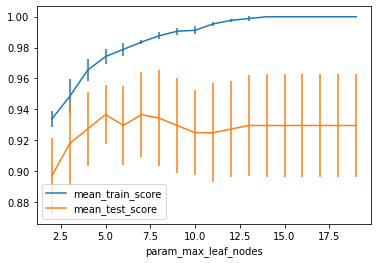

In [45]:
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score' , ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score' , ax=plt.gca())

#### Tree visulaization

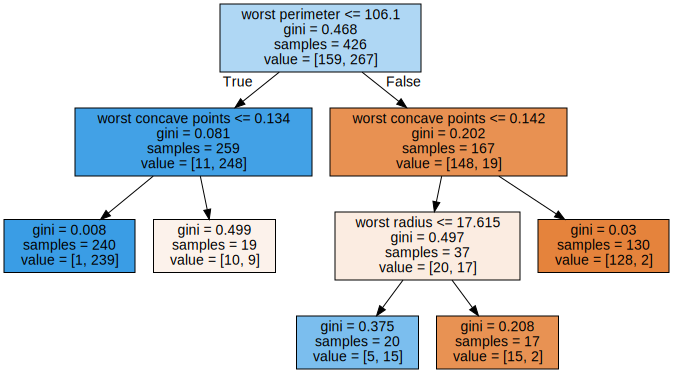

In [46]:
# we will now plot the best estimator
tree_dot = export_graphviz(grid_tree.best_estimator_, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph

### max_depth

In [47]:
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 123)
param_DT = {"max_depth": range(1,20)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5, return_train_score=True)
grid_tree.fit(X_train,y_train)
print(grid_tree.best_params_)
print(f'Best Mean Cross Validation Score is {grid_tree.best_score_}')
print("Accuracy on training set: {:.3f}".format(grid_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid_tree.score(X_test, y_test)))

{'max_depth': 5}
Best Mean Cross Validation Score is 0.927250341997264
Accuracy on training set: 1.000
Accuracy on test set: 0.930


<AxesSubplot:xlabel='param_max_depth'>

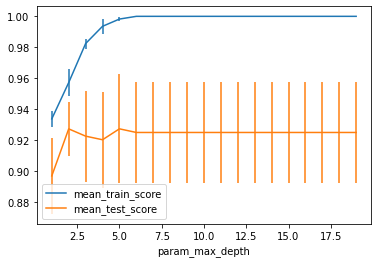

In [49]:
scores = pd.DataFrame(grid_tree.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score' , ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score' , ax=plt.gca())


#### Tree visulaization

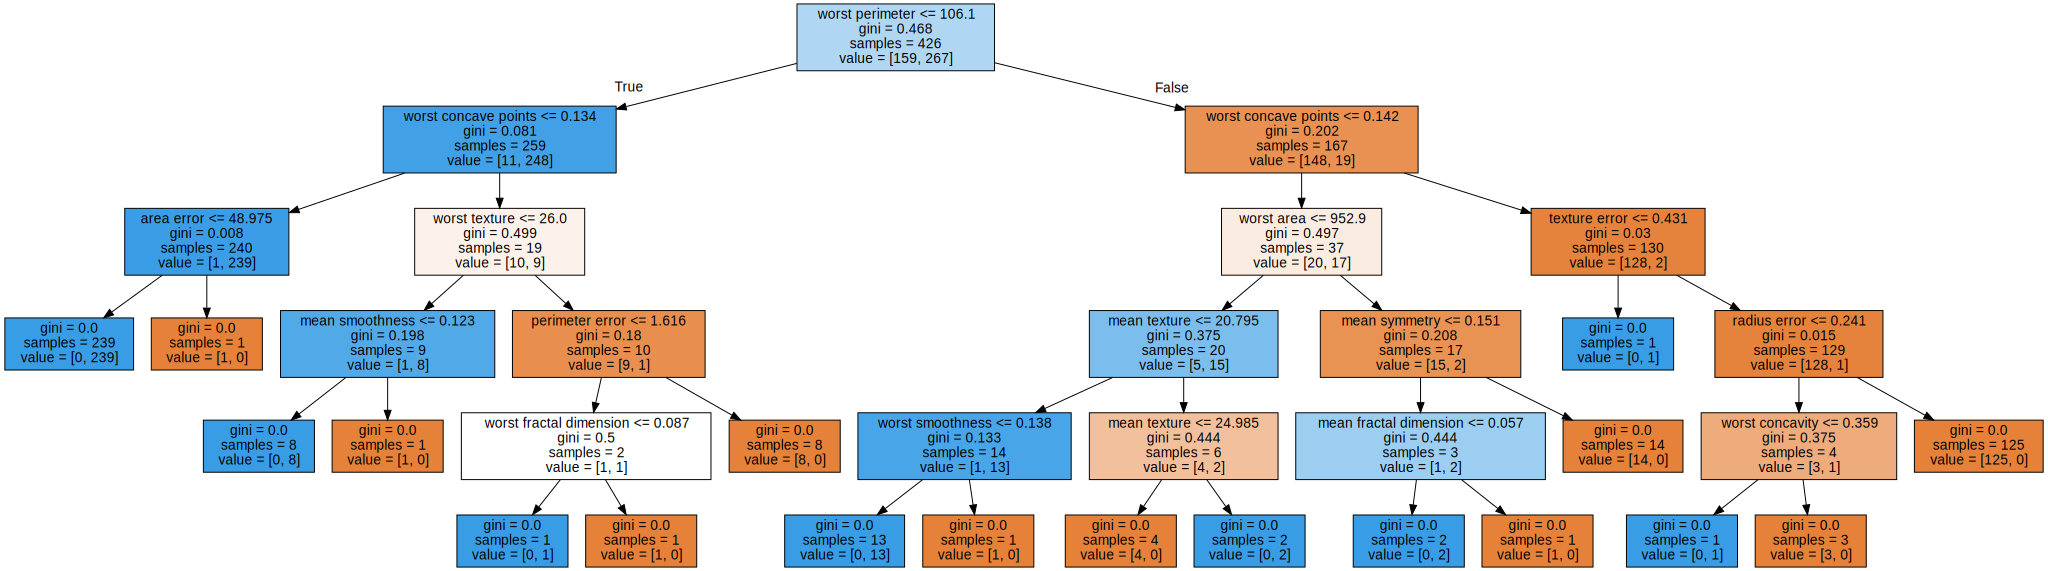

In [50]:
# we will now plot the best estimator
tree_dot = export_graphviz(grid_tree.best_estimator_, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph

### Cost-complexity pruning

In [51]:
# cheating a bit to get a good grid:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

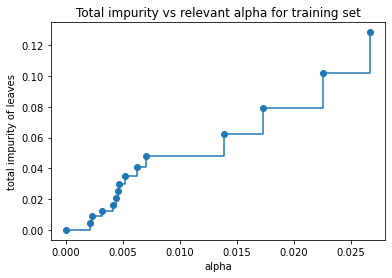

In [52]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total impurity vs relevant alpha for training set")
plt.savefig(folder / "images/pruning_alpha.png")

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {'ccp_alpha': np.linspace(0., 0.03, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), 
                    param_grid=param_grid,
                    cv=5, 
                    return_train_score=True)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(f'Best Mean Cross Validation Score is {grid.best_score_}')
print("Accuracy on training set: {:.3f}".format(grid.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grid.score(X_test, y_test)))

{'ccp_alpha': 0.01263157894736842}
Best Mean Cross Validation Score is 0.9389876880984952
Accuracy on training set: 0.972
Accuracy on test set: 0.923


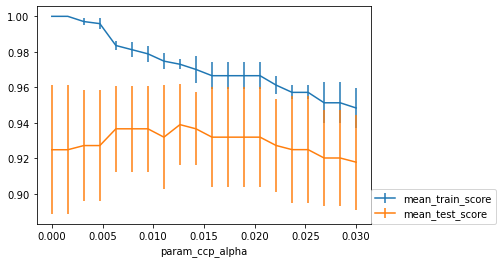

In [55]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', 
            yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_ccp_alpha', y='mean_test_score', 
            yerr='std_test_score', ax=plt.gca())
plt.legend(loc=(1, 0))
plt.savefig(folder / "images/grid_ccp_alpha.png")

#### Tree visualization

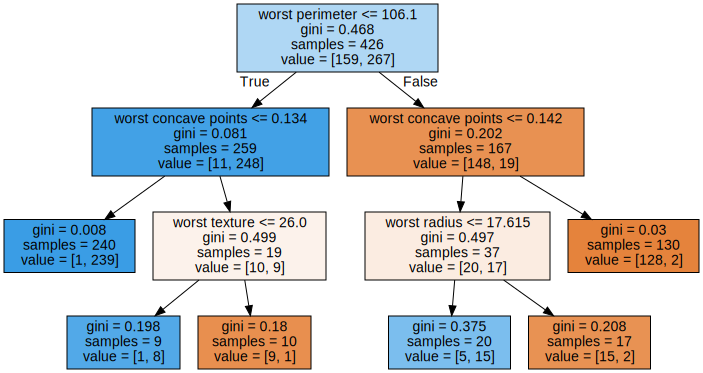

In [56]:
tree_dot = export_graphviz(grid.best_estimator_, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename=folder / "images/tree_pruned", cleanup=True)
graph